# Nobel prizes

## 1. Loading the data
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

# Gift

In [1]:
# Loading in required libraries: you will need pandas, seaborn and numpy
import pandas as pd
import seaborn as sns
import numpy as np


# Reading in the Nobel Prize data
nobel = pd.read_csv("datasets/nobel.csv")

# Explore the data - are there missing values? How many entries do we have?
# ... YOUR CODE FOR TASK 1 ...
sumnull = nobel.isnull() # checking if there are null entries
print( sumnull.sum()) # sum of all the null entries
print(nobel.head()) #Determining how many antries we have

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64
   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation pri

## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [64]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
print(len(nobel['prize_share'])) #determining the number of nobel prizes shared between 1901 and 2016


# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
print(nobel['sex'].value_counts()) # number of prizes won by females and males

# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
print(nobel['birth_country'].value_counts().head(10)) # 10 contries that won the most prizes

911
Male      836
Female     49
Name: sex, dtype: int64
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64


Which countries win most often? 
* United States of America and United Kingdom with have the most wins with 259 and 85 respectively,

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>
    

In [7]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel["birth_country"] == "United States of America" # usa winners
nobel['decade'] = (np.floor(nobel["year"] / 10) * 10).astype(int)# Winners by decate
# grouping USA winner by decate

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
prop_usa_winners #printing the proportion orf usa winners by decate of when the USA the nobel Prize charts


,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846






## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>


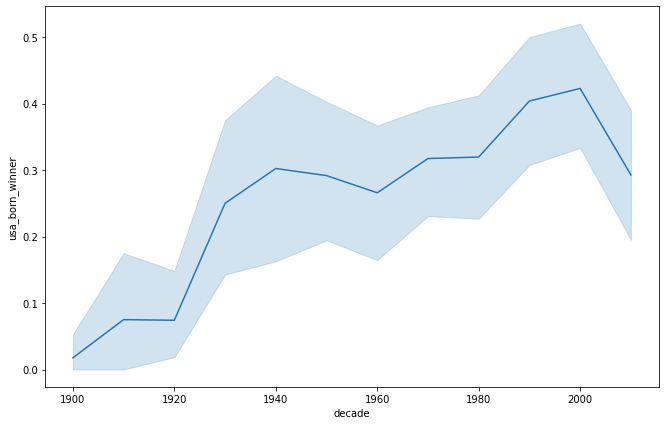

In [38]:
#using seaborn, plot the proportion of US winners by decade
graph1 = sns.lineplot(x = nobel['decade'], y= nobel['usa_born_winner']) #graph plotting







What can you conclude from the graph?
* The USA born winners were increasing by decade and decreased drastically in the decate 2010.

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

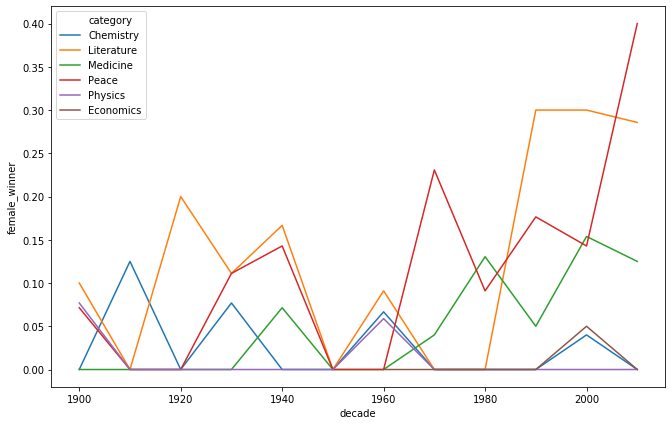

In [23]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean() #fema1e winners by each category 

# Plotting USA born winners with % winners on the y-axis
graph2 = sns.lineplot(x="decade", y="female_winner", hue="category", data=prop_female_winners)



```
# This is formatted as code
```

 Interpret your plot here
 * The peace female nobel prize winners were the highest in 1970s and 2010s, and it was the lowest in the 1920s anf the whole decate of 1950s.
 * The literature female nobel prize winners were the highest in 1920s,1940s,1960s and the 1970s, and was the lowest in the year 1910s,1950s and the whole decate of 1970.
 * The chemistry female nobel prize winners were the highest in 1910s, and was the lowest in the year 1920s,the whole decate of 1940 and the two decates between 1970 and 1990.
 * Medicine was the lowest for three decates which is from 1900s to 1930s, and the dacate from 1950s to 1960s.
 * Physics was the lowes for four decates between 1910s to 1950s, and also for five decates which is from 1970s to 2010
 * Economics has been in its lowest since the beginning of the giving away of the nobel prizes and got it's hights point in the year 2000.
 * ## And all the categories were the lowest in the year 1930s.

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>


In [85]:
# Picking out the first woman to win a Nobel Prize

#the year in which the first female won the nobel prize
g = nobel[nobel["sex"] == "Female"]
g.nsmallest(1, "year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [86]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 7 ...
nobel.groupby("full_name").filter(lambda x: len(x) >= 2) 

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,False,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,False,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,False,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False





How many people have received 2 or more prizes?
* 13 people recieved 2 or more awards or nobel peizes

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

In [36]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel["birth_date"])
print(nobel['birth_date'])

print('')

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel["year"] - nobel["birth_date"].dt.year
print(nobel['age'])


# What is the mean age of winners and it's standard devation? What is the median age?


0     1852-08-30
1     1839-03-16
2     1854-03-15
3     1828-05-08
4     1822-05-20
         ...    
906   1945-02-09
907   1951-08-10
908   1934-09-21
909   1951-09-14
910   1943-06-22
Name: birth_date, Length: 911, dtype: datetime64[ns]

0      49.0
1      62.0
2      47.0
3      73.0
4      79.0
       ... 
906    71.0
907    65.0
908    82.0
909    65.0
910    73.0
Name: age, Length: 911, dtype: float64


## 9. Age differences between prize categories


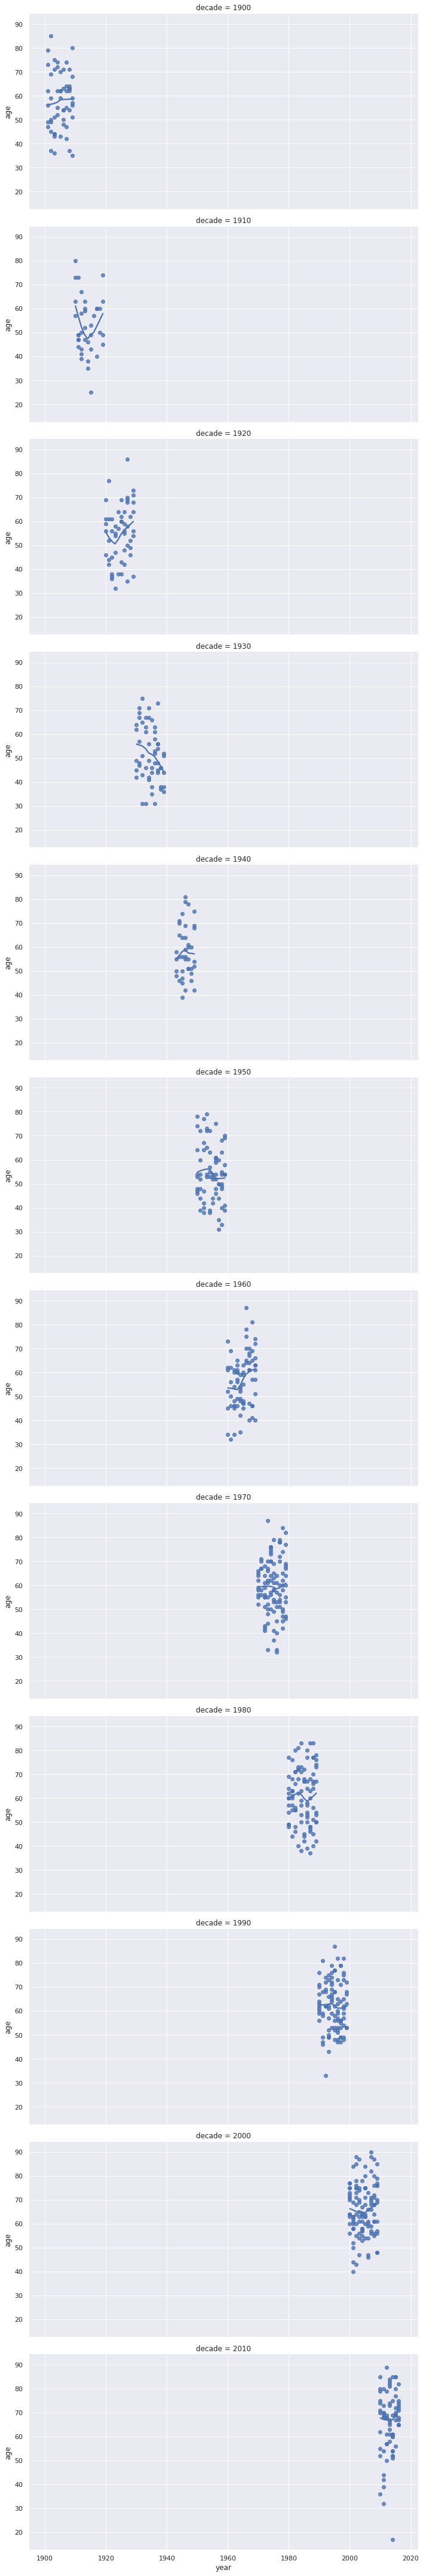

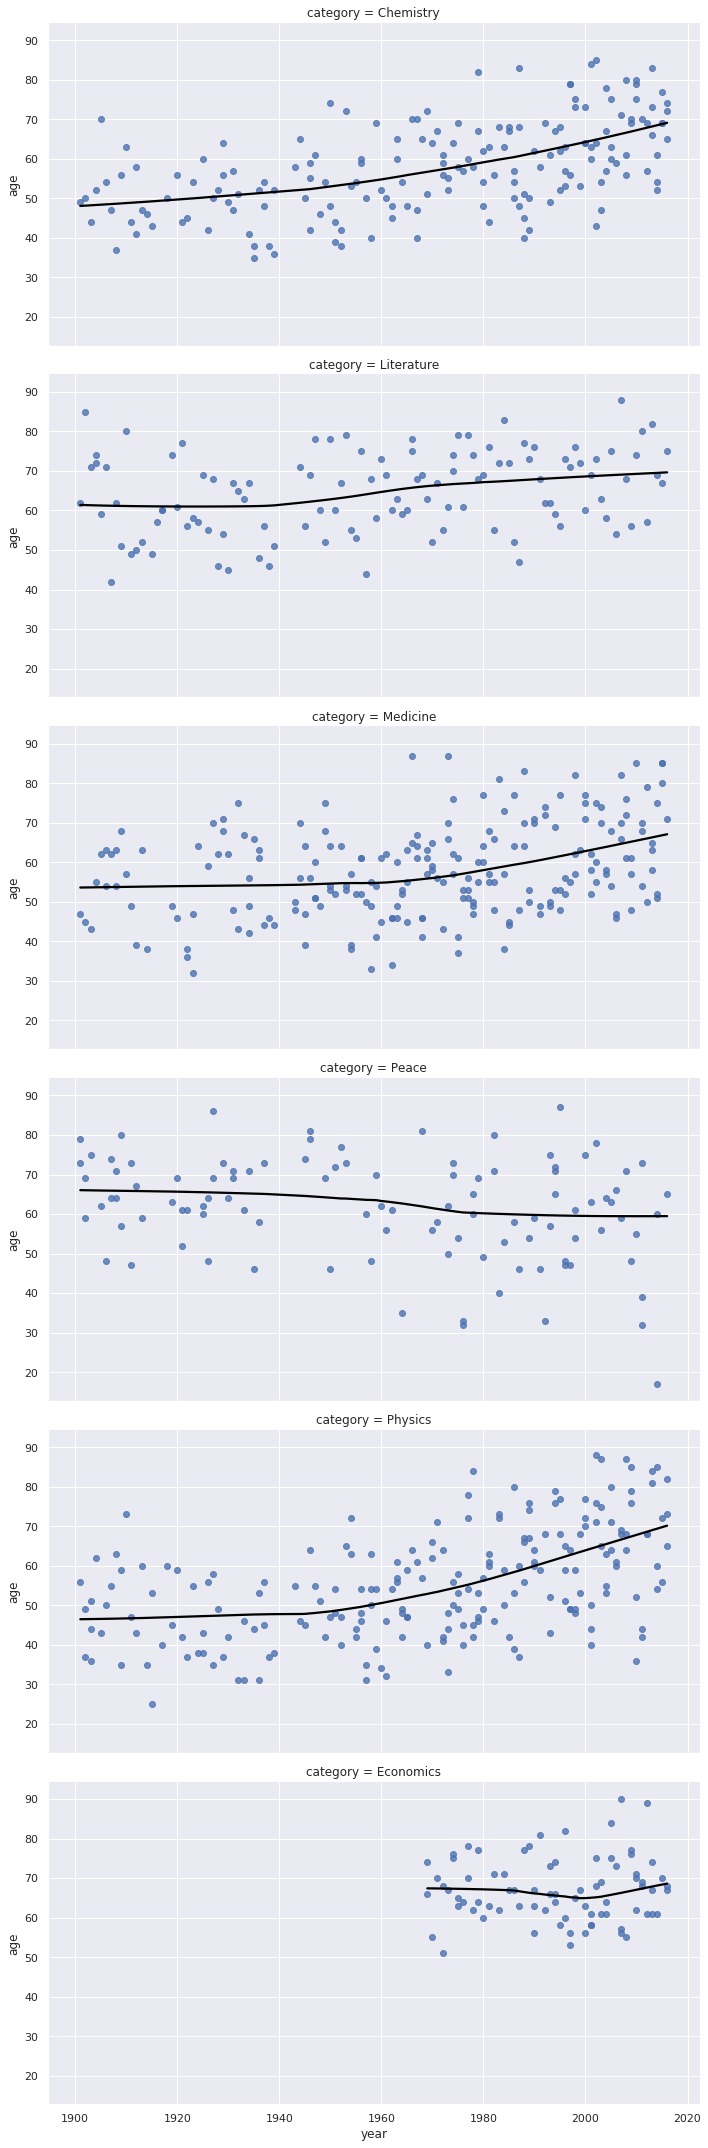

In [110]:
#Plot the age of nobel candidates by decade
#YOUR CODE FOR TASK 9 ...
sns.lmplot(x= 'year', y='age', data=nobel,row= "decade",lowess = True, aspect=2)

# Plot the age of nobel candidates by decade and prize category
sns.lmplot(x="year", y="age", data=nobel, row = "category", lowess = True, aspect=2, line_kws = {"color" : "black"})

What can you conclude about the age at which people win different types of Nobel Prizes?
* Chemistry people won the nobel prizes between 30 years of age and 90 years from year 1901
* literature people won the  nobel prizes between 40 and 90 years of age from 1901.
* Medicine people also won the prizes between the ages of 30 and 90 from 1901.
* Peace category people won between the ages of 15 and 80 from year 1901.
* Physics people won between the ages 20 and 80 from year 1901.
* Economics people won the noble prizes between the ages 50 and 95 from after the 1960s.

## 10. Oldest and youngest winners
<p>In the peace category there is a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [37]:
# The oldest winner of a Nobel Prize as of 2016
print(nobel.nlargest(1, "age")) 

print('')

# The youngest winner of a Nobel Prize as of 2016
print(nobel.nsmallest(1, "age"))

     year   category                                              prize  \
793  2007  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
793  "for having laid the foundations of mechanism ...         1/3   

     laureate_id laureate_type       full_name birth_date birth_city  ...  \
793          820    Individual  Leonid Hurwicz 1917-08-21     Moscow  ...   

           organization_name organization_city      organization_country  \
793  University of Minnesota   Minneapolis, MN  United States of America   

     death_date       death_city             death_country usa_born_winner  \
793  2008-06-24  Minneapolis, MN  United States of America           False   

    decade   age  female_winner  
793   2000  90.0          False  

[1 rows x 22 columns]

     year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motiva

## Explanation
* The oldest winner was in the year 2007 in the category of Economics at the age of 90 and was a female.
* The youngest winner won the prize in the year 2017 in the category of Peace at the age of 17 and was also female.


## Congratulations! You've reached the end of the challenge!